In [78]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

import pickle

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv( "/home/bautista/Datos/Machine-Learning-Datos/FeatureEngineering/df_time_series.csv" )
df = df.drop(columns = {'Unnamed: 0', 'Delivery_Year', 'Delivery_Quarter'})
df

,Region,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision,Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
0,EMEA,2.773332,0,2,Other,Other,0,1,0,2.496126,2.585640,NaN,3.088401
1,EMEA,2.740425,0,2,Product_Name_210,Other,1,1,0,2.486798,2.545803,2.585640,2.098247
2,EMEA,2.999379,0,3,Product_Name_432,Other,1,1,0,2.499777,2.852610,2.545803,2.583974
3,APAC,2.780462,0,7,Other,Other,0,0,0,2.448872,2.594236,2.852610,1.552569
4,APAC,2.647444,0,2,Product_Name_91,Person_Name_11,1,1,1,2.467621,2.468684,NaN,3.019307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,Americas,2.845924,1,6,Product_Name_488,Person_Name_8,1,1,1,2.544620,2.706302,2.740744,2.097463
13579,Americas,2.819796,1,6,Product_Name_483,Person_Name_8,1,1,1,2.544620,2.706302,2.740744,2.097463
13580,Americas,2.845924,1,6,Product_Name_488,Person_Name_8,1,1,1,2.544620,2.706302,2.740744,2.097463
13581,Americas,3.032890,1,10,Product_Name_445,Person_Name_8,1,1,0,2.544620,2.706302,2.740744,2.097463


In [45]:
df = df.fillna(0)

In [46]:
df.describe()

,Total_Amount,Años en entregar,Month Created,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision,Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
count,13583.000000,13583.000000,13583.000000,13583.000000,13583.00000,13583.000000,13583.000000,13583.000000,13583.000000,13583.000000
mean,2.651080,0.255025,6.574321,0.569388,0.77332,0.554001,2.449497,2.444527,2.339767,2.183309
std,0.177250,0.466251,3.421165,0.495180,0.41870,0.497094,0.098289,0.142587,0.531066,0.214954
min,0.000000,-1.000000,1.000000,0.000000,0.00000,0.000000,2.219173,1.336753,0.000000,0.000000
25%,2.588674,0.000000,4.000000,0.000000,1.00000,0.000000,2.437621,2.401642,2.389793,2.088779
50%,2.656112,0.000000,6.000000,1.000000,1.00000,1.000000,2.491107,2.465992,2.466176,2.159336
75%,2.753412,0.000000,10.000000,1.000000,1.00000,1.000000,2.499777,2.544160,2.546746,2.217261
max,3.104954,5.000000,12.000000,1.000000,1.00000,1.000000,2.553549,2.973900,2.852610,3.240224


# Encode

In [47]:
Mean_encoded_subject_region = df.groupby(['Region'])['Decision'].mean().to_dict() 

df['Region'] =  df['Region'].map(Mean_encoded_subject_region)

#--------------------------------------------------------------------------------------------

mean_encoded_product = df.groupby("Product_Name")["Decision"].mean().to_dict()

df["Product_Name"] = df["Product_Name"].map(mean_encoded_product)

#--------------------------------------------------------------------------------------------

#Mean_encoded_subject_quarter = df.groupby(['Delivery_Quarter'])['Decision'].mean().to_dict() 

#df['Delivery_Quarter'] =  df['Delivery_Quarter'].map(Mean_encoded_subject_quarter)

#--------------------------------------------------------------------------------------------

Mean_encoded_subject_owner = df.groupby(['Opportunity_Owner'])['Decision'].mean().to_dict() 

df['Opportunity_Owner'] =  df['Opportunity_Owner'].map(Mean_encoded_subject_owner)

# Split

In [48]:
X_test = df.tail(math.floor(df.shape[0]*0.20)).drop(columns = {'Decision'})
y_test = df.tail(math.floor(df.shape[0]*0.20))['Decision']
X_train = df.head(round(df.shape[0]*0.80)).drop(columns = {'Decision'})
y_train = df.head(round(df.shape[0]*0.80))['Decision']
X_train

,Region,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
0,0.532255,2.773332,0,2,0.445844,0.000000,0,1,2.496126,2.585640,0.000000,3.088401
1,0.532255,2.740425,0,2,0.283582,0.000000,1,1,2.486798,2.545803,2.585640,2.098247
2,0.532255,2.999379,0,3,0.009174,0.000000,1,1,2.499777,2.852610,2.545803,2.583974
3,0.587888,2.780462,0,7,0.445844,0.000000,0,0,2.448872,2.594236,2.852610,1.552569
4,0.587888,2.647444,0,2,0.900000,0.371429,1,1,2.467621,2.468684,0.000000,3.019307
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.587888,2.817755,0,9,0.055556,0.252427,1,1,2.448872,2.594527,2.441786,2.357726
10862,0.587888,2.793234,0,10,0.333333,0.252427,1,1,2.448872,2.594527,2.441786,2.357726
10863,0.587888,2.541749,0,10,0.722798,0.252427,1,1,2.448872,2.594527,2.441786,2.357726
10864,0.587888,2.772403,0,10,0.333333,0.252427,1,1,2.448872,2.594527,2.441786,2.357726


In [49]:
X_train.to_csv('X_train_timeSeries.csv')
y_train.to_csv('y_train_timeSeries.csv')
X_test.to_csv('X_test_timeSeries.csv')
y_test.to_csv('y_test_timeSeries.csv')

# Random Search

In [50]:
import sklearn as sk
import sklearn.neural_network


lr = 0.001           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.
nr = [3, 15, 10]
nd = [1,20,6,2]

# Creamos el objeto del modelo de red neuronal multicapa.
modelRegresor = sk.neural_network.MLPRegressor(solver='adam', 
                                     activation = 'logistic',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)

In [51]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [52]:
params = {
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'alpha': [0.0001,0.10, 0.001,1, 10],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'hidden_layer_sizes': [tuple(nn[1:]), tuple(nr[1:]), tuple(nd[1:])],
        'learning_rate_init' : [0.1,0.01, 0.001],
        'n_iter_no_change' : [10, 1000, 100, 10000],
        'batch_size' : [64, 100, 200]
        }

In [53]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(modelRegresor, param_distributions=params, n_iter=param_comb,scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.2min finished


Iteration 1, loss = 0.55432932
Iteration 2, loss = 0.23061256
Iteration 3, loss = 0.16298137
Iteration 4, loss = 0.13105639
Iteration 5, loss = 0.11286885
Iteration 6, loss = 0.10205503
Iteration 7, loss = 0.09556476
Iteration 8, loss = 0.09011769
Iteration 9, loss = 0.08679389
Iteration 10, loss = 0.08552888
Iteration 11, loss = 0.08368045
Iteration 12, loss = 0.08302066
Iteration 13, loss = 0.08305780
Iteration 14, loss = 0.08232947
Iteration 15, loss = 0.08237365
Iteration 16, loss = 0.08194113
Iteration 17, loss = 0.08210860
Iteration 18, loss = 0.08220132
Iteration 19, loss = 0.08241813
Iteration 20, loss = 0.08165070
Iteration 21, loss = 0.08139594
Iteration 22, loss = 0.08332270
Iteration 23, loss = 0.08165921
Iteration 24, loss = 0.08113590
Iteration 25, loss = 0.08178250
Iteration 26, loss = 0.08120144
Iteration 27, loss = 0.08242331
Iteration 28, loss = 0.08097883
Iteration 29, loss = 0.08177063
Iteration 30, loss = 0.08095017
Iteration 31, loss = 0.08155885
Iteration 32, los

In [54]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([34.06603845, 29.95802132, 11.53619432, 12.10627143,  5.85165532]), 'std_fit_time': array([0.64903735, 0.84418182, 0.19052601, 0.65794897, 1.46933629]), 'mean_score_time': array([0.01518464, 0.01207829, 0.00987458, 0.00646448, 0.01987592]), 'std_score_time': array([0.00232305, 0.00059124, 0.00058714, 0.00157324, 0.01243578]), 'param_n_iter_no_change': masked_array(data=[1000, 1000, 100, 10000, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate_init': masked_array(data=[0.1, 0.01, 0.001, 0.001, 0.01],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=['constant', 'invscaling', 'adaptive', 'constant',
                   'invscaling'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_arra

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_iter_no_change,param_learning_rate_init,param_learning_rate,param_hidden_layer_sizes,param_batch_size,param_alpha,param_activation,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,34.066038,0.649037,0.015185,0.002323,1000,0.1,constant,"(15, 10)",64,10,logistic,"{'n_iter_no_change': 1000, 'learning_rate_init...",0.341915,0.520465,0.526675,0.463018,0.085671,5
1,29.958021,0.844182,0.012078,0.000591,1000,0.01,invscaling,"(16, 8, 1)",100,0.1,relu,"{'n_iter_no_change': 1000, 'learning_rate_init...",0.500000,0.500000,0.868423,0.622808,0.173676,4
2,11.536194,0.190526,0.009875,0.000587,100,0.001,adaptive,"(15, 10)",200,0.0001,identity,"{'n_iter_no_change': 100, 'learning_rate_init'...",0.855728,0.857518,0.854845,0.856031,0.001112,2
3,12.106271,0.657949,0.006464,0.001573,10000,0.001,constant,"(16, 8, 1)",200,0.0001,identity,"{'n_iter_no_change': 10000, 'learning_rate_ini...",0.857041,0.858251,0.854973,0.856755,0.001354,1
4,5.851655,1.469336,0.019876,0.012436,10,0.01,invscaling,"(15, 10)",64,0.1,logistic,"{'n_iter_no_change': 10, 'learning_rate_init':...",0.850506,0.852672,0.848946,0.850708,0.001528,3


In [55]:
LinReg_pred_random = random_search.predict(X_test)

In [56]:
probando = pd.DataFrame()
probando['target'] = LinReg_pred_random
probando.describe()

,target
count,2716.000000
mean,0.573652
std,0.275153
min,-0.299905
25%,0.379803
50%,0.651835
75%,0.772291
max,1.202593


In [57]:
random_search.score(X_test, y_test)

0.8413468978135411

In [58]:
loss_random = log_loss(y_test  , LinReg_pred_random)
print(f"Log loss is {loss_random}")

Log loss is 0.5683093678300886


# No Serch

In [59]:
import sklearn as sk
import sklearn.neural_network


lr = 0.001           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
modelRegresor = sk.neural_network.MLPRegressor(solver='adam', 
                                     activation = 'logistic',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)

In [60]:
modelRegresor.fit(X_train, y_train)

Iteration 1, loss = 0.80949032
Iteration 2, loss = 0.56630917
Iteration 3, loss = 0.42931293
Iteration 4, loss = 0.33273475
Iteration 5, loss = 0.26265364
Iteration 6, loss = 0.21274578
Iteration 7, loss = 0.17838095
Iteration 8, loss = 0.15567796
Iteration 9, loss = 0.14143825
Iteration 10, loss = 0.13301093
Iteration 11, loss = 0.12836252
Iteration 12, loss = 0.12599852
Iteration 13, loss = 0.12490162
Iteration 14, loss = 0.12445679
Iteration 15, loss = 0.12429143
Iteration 16, loss = 0.12422453
Iteration 17, loss = 0.12420550
Iteration 18, loss = 0.12419435
Iteration 19, loss = 0.12419166
Iteration 20, loss = 0.12419157
Iteration 21, loss = 0.12418658
Iteration 22, loss = 0.12417533
Iteration 23, loss = 0.12415956
Iteration 24, loss = 0.12408115
Iteration 25, loss = 0.12366440
Iteration 26, loss = 0.12231222
Iteration 27, loss = 0.11931856
Iteration 28, loss = 0.11221724
Iteration 29, loss = 0.09997776
Iteration 30, loss = 0.09057943
Iteration 31, loss = 0.08564127
Iteration 32, los

MLPRegressor(activation='logistic', batch_size=64,
             hidden_layer_sizes=(16, 8, 1), n_iter_no_change=1000,
             verbose=True)

In [61]:
LinReg_pred = modelRegresor.predict(X_test)

In [62]:
probando = pd.DataFrame()
probando['target'] = LinReg_pred
probando.describe()

,target
count,2716.000000
mean,0.614641
std,0.305814
min,-0.000342
25%,0.338462
50%,0.729135
75%,0.868124
max,1.024712


In [63]:
modelRegresor.score(X_test, y_test)

0.3425718650354006

In [64]:
loss = log_loss(y_test  , LinReg_pred)
print(f"Log loss is {loss}")

Log loss is 0.47886563433540186


In [65]:
#pickle.dump(modelRegresor, open('modeloRegresorRN.p', 'wb'))

# Kaggle

In [66]:
DataFrame_test = pd.read_csv( "/home/bautista/Datos/Machine-Learning-Datos/FeatureEngineering/df_time_series_test.csv" )
DataFrame_test

,Unnamed: 0,Opportunity_ID,Region,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,Delivery_Year,Delivery_Quarter,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
0,171,10792,EMEA,12.087389,0,1,Product_Name_201,Person_Name_13,2019,Q1,1,1,11.753909,11.001991,NaN,11.000704
1,226,10806,EMEA,10.325097,0,1,Product_Name_241,Person_Name_13,2019,Q1,0,1,11.753909,11.001991,NaN,11.000704
2,238,10812,EMEA,11.479095,0,1,Product_Name_303,Person_Name_13,2019,Q1,1,1,11.753909,11.001991,NaN,11.000704
3,270,10836,EMEA,10.155219,0,1,Product_Name_182,Person_Name_13,2019,Q1,1,1,11.753909,11.001991,NaN,11.000704
4,282,10845,EMEA,9.975017,0,1,Product_Name_283,Person_Name_13,2019,Q1,1,1,11.753909,11.001991,NaN,11.000704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2519,12347,Americas,15.340732,1,4,Product_Name_487,Person_Name_9,2020,Q2,1,1,13.556432,15.849836,0.905656,15.849826
1563,2520,12348,Americas,16.193551,1,4,Product_Name_475,Person_Name_9,2020,Q2,1,1,13.556432,15.849836,0.905656,15.849826
1564,2521,12349,Americas,15.831542,1,4,Product_Name_432,Person_Name_9,2020,Q2,1,1,13.556432,15.849836,0.905656,15.849826
1565,2522,12350,Americas,16.193551,1,4,Product_Name_475,Person_Name_9,2020,Q3,1,1,14.756877,16.193551,0.939492,16.193544


In [67]:
subir = pd.DataFrame()
subir['Opportunity_ID'] = DataFrame_test['Opportunity_ID']
DataFrame_test = DataFrame_test.drop(columns = {'Opportunity_ID', 'Unnamed: 0', 'Delivery_Year', 'Delivery_Quarter'}).fillna(0)
DataFrame_test

,Region,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
0,EMEA,12.087389,0,1,Product_Name_201,Person_Name_13,1,1,11.753909,11.001991,0.000000,11.000704
1,EMEA,10.325097,0,1,Product_Name_241,Person_Name_13,0,1,11.753909,11.001991,0.000000,11.000704
2,EMEA,11.479095,0,1,Product_Name_303,Person_Name_13,1,1,11.753909,11.001991,0.000000,11.000704
3,EMEA,10.155219,0,1,Product_Name_182,Person_Name_13,1,1,11.753909,11.001991,0.000000,11.000704
4,EMEA,9.975017,0,1,Product_Name_283,Person_Name_13,1,1,11.753909,11.001991,0.000000,11.000704
...,...,...,...,...,...,...,...,...,...,...,...,...
1562,Americas,15.340732,1,4,Product_Name_487,Person_Name_9,1,1,13.556432,15.849836,0.905656,15.849826
1563,Americas,16.193551,1,4,Product_Name_475,Person_Name_9,1,1,13.556432,15.849836,0.905656,15.849826
1564,Americas,15.831542,1,4,Product_Name_432,Person_Name_9,1,1,13.556432,15.849836,0.905656,15.849826
1565,Americas,16.193551,1,4,Product_Name_475,Person_Name_9,1,1,14.756877,16.193551,0.939492,16.193544


# Encoding

In [68]:
DataFrame_test['Region'] =  DataFrame_test['Region'].map(Mean_encoded_subject_region)

#--------------------------------------------------------------------------------------------

DataFrame_test["Product_Name"] = DataFrame_test["Product_Name"].map(mean_encoded_product)

#--------------------------------------------------------------------------------------------

#DataFrame_test['Delivery_Quarter'] =  DataFrame_test['Delivery_Quarter'].map(Mean_encoded_subject_quarter)

#--------------------------------------------------------------------------------------------

DataFrame_test['Opportunity_Owner'] =  DataFrame_test['Opportunity_Owner'].map(Mean_encoded_subject_owner)
DataFrame_test = DataFrame_test.fillna(0.406068)

In [70]:
DataFrame_test.to_csv('Kaggle_test_timeSeries.csv')

In [71]:
DataFrame_test.isnull().sum()

Region                                 0
Total_Amount                           0
Años en entregar                       0
Month Created                          0
Product_Name                           0
Opportunity_Owner                      0
Pricing, Delivery_Terms_Approved       0
Pricing, Delivery_Terms_Quote_Appr     0
Promedio_Region_Por_Quarter            0
Promedio_Owner_Por_Year_And_Quarter    0
Lag_1                                  0
Delta                                  0
dtype: int64

# Prediction

In [72]:
pred_posta = modelRegresor.predict(DataFrame_test)

In [73]:
subir['target'] = pred_posta
subir.set_index('Opportunity_ID', inplace = True)
subir

,target
Opportunity_ID,
10792,0.087436
10806,0.184392
10812,0.084422
10836,0.155922
10845,0.131311
...,...
12347,0.087984
12348,0.070716
12349,0.050476


In [74]:
subir.describe()

,target
count,1567.000000
mean,0.140774
std,0.093937
min,0.026488
25%,0.094079
50%,0.119634
75%,0.152352
max,1.000201


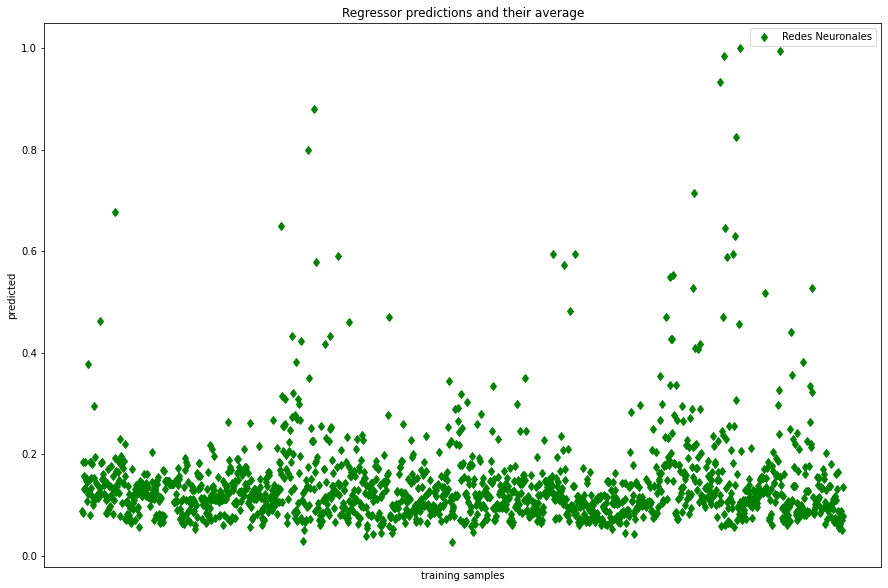

In [79]:
plt.figure(figsize=(15,10))

plt.plot(pred_posta, 'gd', label='Redes Neuronales')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

In [80]:
#subir.to_csv('RedesNeuronales_Entrega_9.csv')

# Random Search

In [81]:
pred_posta = random_search.predict(DataFrame_test)

In [82]:
subir['target'] = pred_posta
subir

,target
Opportunity_ID,
10792,2.106596
10806,2.831200
10812,2.192382
10836,3.004430
10845,2.889874
...,...
12347,2.625021
12348,2.295556
12349,2.191753


In [83]:
subir.describe()

,target
count,1567.000000
mean,3.031817
std,0.725145
min,1.101182
25%,2.548146
50%,2.943192
75%,3.462881
max,6.364949


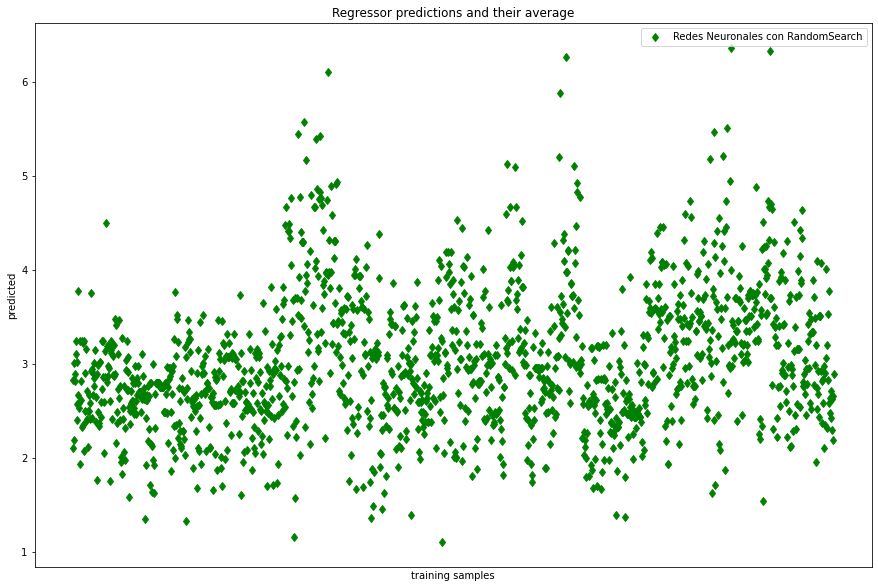

In [85]:
plt.figure(figsize=(15,10))

plt.plot(pred_posta, 'gd', label='Redes Neuronales con RandomSearch')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()